In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [ ]:
air_data = pd.read_excel("Airlines+Data.xlsx")
air_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
air_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<Axes: >

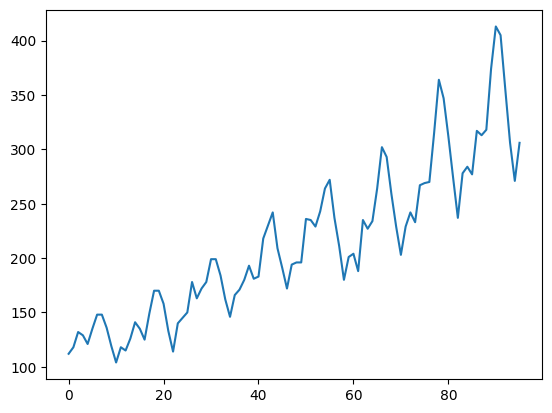

In [ ]:
air_data.Passengers.plot()

<Axes: ylabel='Density'>

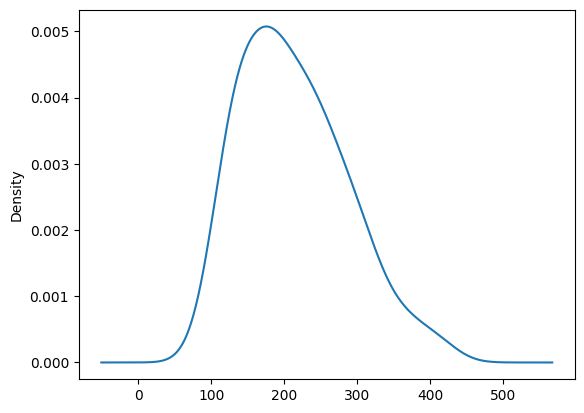

In [ ]:
air_data.Passengers.plot(kind='kde')

<Axes: ylabel='Frequency'>

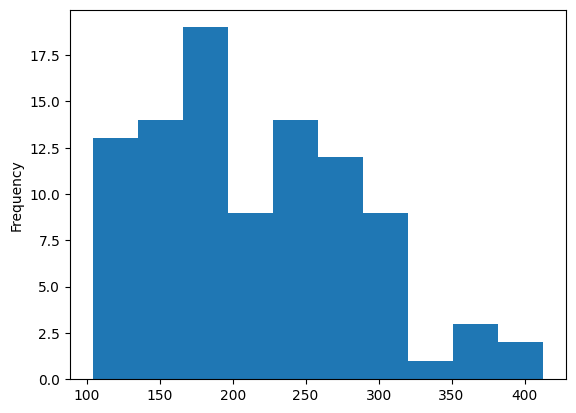

In [ ]:
air_data.Passengers.plot(kind='hist')

In [ ]:
temp=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

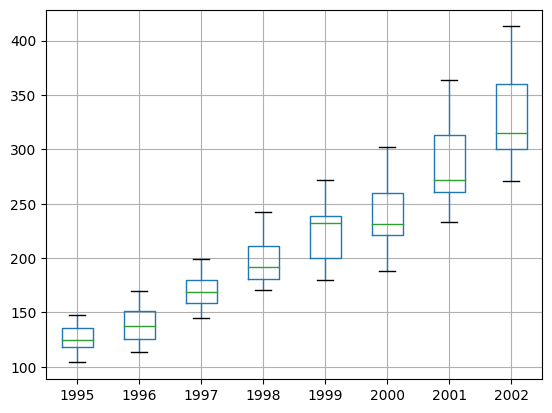

In [ ]:
group=temp.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for i,j in group:
    years[i.year]=j.values
years.boxplot()
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

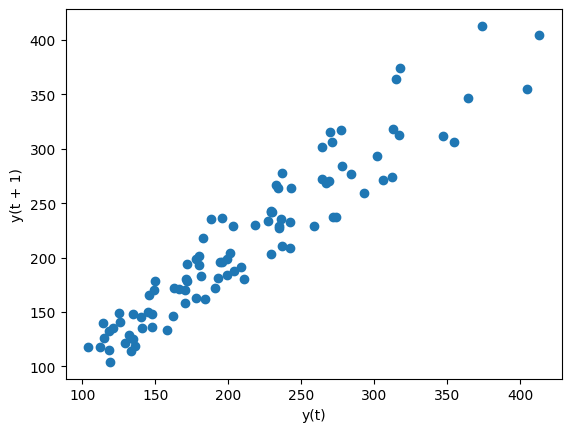

In [ ]:
lag_plot(temp)

In [ ]:
train = air_data.head(77)
test = air_data.tail(19)

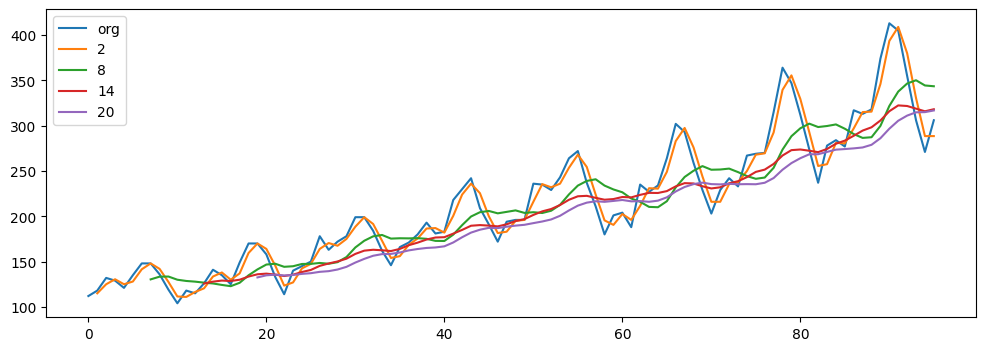

In [ ]:
plt.figure(figsize=(12,4))
air_data.Passengers.plot(label="org")
for i in range(2,24,6):
    air_data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

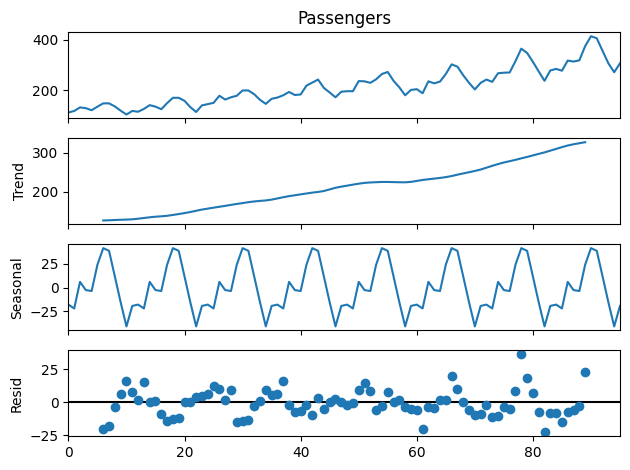

In [ ]:
decompose_ts_add = seasonal_decompose(air_data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

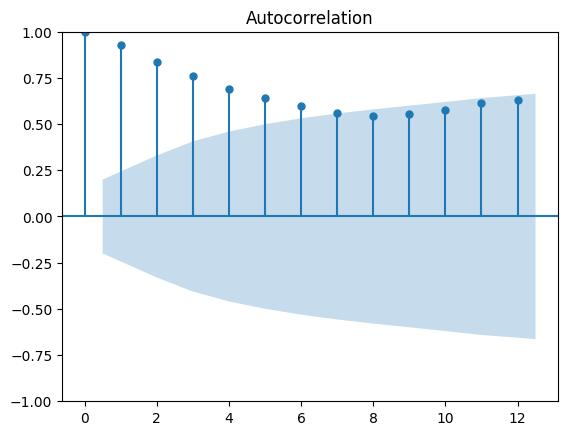

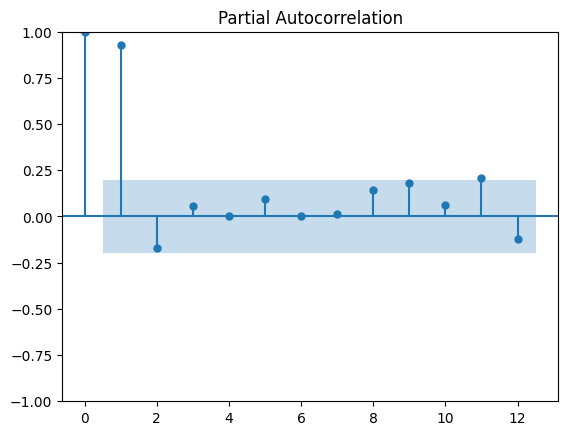

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air_data.Passengers,lags=12)
tsa_plots.plot_pacf(air_data.Passengers,lags=12)
plt.show()

In [ ]:
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

In [ ]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
r1=RMSE(pred_ses,test.Passengers)
r1

80.54332939825719

In [ ]:
# Holt method
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
r2=RMSE(pred_hw,test.Passengers)
r2

47.87772866994824

In [ ]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
r3=RMSE(pred_hwe_add_add,test.Passengers)
r3

35.902298336684105

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
r4=RMSE(pred_hwe_mul_add,test.Passengers)
r4

30.905644200950647

In [ ]:
t={"model":pd.Series(['Simple exponential','Holts model','Holts-add seas,add trend','holts-mul sea,add trend']),
   "RMSE":[r1,r2,r3,r4]
  }

In [ ]:
t=pd.DataFrame(t)
t

,model,RMSE
0,Simple exponential,80.543329
1,Holts model,47.877729
2,"Holts-add seas,add trend",35.902298
3,"holts-mul sea,add trend",30.905644


In [ ]:
hwe_model_mul_add_new = ExponentialSmoothing(air_data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [ ]:
hwe_model_mul_add_new.forecast(10)

96     312.899424
97     308.171306
98     355.532782
99     345.769814
100    345.696096
101    392.470733
102    436.501361
103    429.859243
104    380.172872
105    332.317301
dtype: float64

#From the above models, the model with the lowest RMSE value is holts winter exponential smoothing with multiplicative seasonality and additive trend. Thus, we use it to forecast the airlines passengers using the same model